### Lectura del archivo

In [21]:
import pandas as pd

datos = pd.read_csv("altura_peso.csv", sep=",", skiprows=32, usecols=[0,1])
x = datos.iloc[:,0].values
y =  datos.iloc[:,1].values



### Creación del modelo

In [29]:
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.optimizers import SGD


modelo = Sequential()
input_dim = 1
output_dim = 1
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))


sgd = SGD(learning_rate=0.0004, clipvalue=1.0)

modelo.compile(loss='mse', optimizer=sgd)


modelo.summary()

c:\Users\IPF 2023\Desktop\linear-regression-keras\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Entranamiento del modelo

In [33]:
num_epochs = 1000
batch_size = x.shape[0]
historia = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size,
verbose=1)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 37718.0000
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 37690.5547
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 37663.1250
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 37635.7031
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 37608.2891
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 37580.8867
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 37553.5000
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 37526.1133
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 37498.7422
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 37471.3828
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 37444.0273
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 37416.6875
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 37389.3555
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 37362.0352
Epoch 15/5000
1

### Parámetros

In [34]:
capas = modelo.layers[0]  
w, b = capas.get_weights() 
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0], b[0]))


Parámetros: w = 0.4, b = 0.6


### Gráficos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


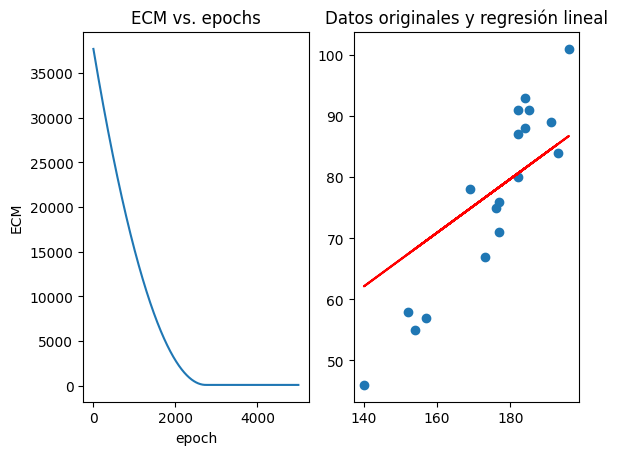

In [35]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')
y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.title('Datos originales y regresión lineal')
plt.show()


### Predicciones

In [36]:
import numpy as np

x_pred = np.array([170])
y_pred = modelo.predict(x_pred)
print("El peso será de {:.1f} kg".format(y_pred[0][0]), 
      "para una persona que mide {} cm".format(x_pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
El peso será de 75.3 kg para una persona que mide 170 cm
